In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 1) Leitura de dados experimentais (exemplo)
df = pd.read_excel("sistema1.xlsx")

df.head()

,Scan Sweep Time (Sec),Scan Number,101Time (Sec),101 (°C),102Time (Sec),102 (°C),103Time (Sec),103 (°C),104Time (Sec),104 (°C),...,113Time (Sec),113 (°C),114Time (Sec),114 (°C),115Time (Sec),115 (°C),116Time (Sec),116 (°C),117Time (Sec),117 (Vac)
0,2024-09-16 08:32:41.540,1,2024-09-16 08:32:41.540,16.674,2024-09-16 08:32:41.580,15.509,2024-09-16 08:32:41.619,15.547,2024-09-16 08:32:41.658,15.579,...,2024-09-16 08:32:42.009,15.747,2024-09-16 08:32:42.047,16.946,2024-09-16 08:32:42.086,16.908,2024-09-16 08:32:42.125,17.020,2024-09-16 08:32:43.323,0.000132
1,2024-09-16 08:32:51.525,2,2024-09-16 08:32:51.525,16.786,2024-09-16 08:32:51.564,15.502,2024-09-16 08:32:51.603,15.601,2024-09-16 08:32:51.642,15.617,...,2024-09-16 08:32:51.992,15.758,2024-09-16 08:32:52.031,16.964,2024-09-16 08:32:52.070,16.858,2024-09-16 08:32:52.109,16.987,2024-09-16 08:32:53.307,0.000131
2,2024-09-16 08:33:01.529,3,2024-09-16 08:33:01.529,16.695,2024-09-16 08:33:01.568,15.425,2024-09-16 08:33:01.607,15.558,2024-09-16 08:33:01.646,15.600,...,2024-09-16 08:33:01.996,15.799,2024-09-16 08:33:02.035,17.001,2024-09-16 08:33:02.074,16.927,2024-09-16 08:33:02.113,16.961,2024-09-16 08:33:03.311,0.000133
3,2024-09-16 08:33:11.526,4,2024-09-16 08:33:11.526,16.673,2024-09-16 08:33:11.565,15.523,2024-09-16 08:33:11.603,15.545,2024-09-16 08:33:11.642,15.597,...,2024-09-16 08:33:11.993,15.776,2024-09-16 08:33:12.032,16.991,2024-09-16 08:33:12.071,16.954,2024-09-16 08:33:12.110,16.988,2024-09-16 08:33:13.308,0.000134
4,2024-09-16 08:33:21.525,5,2024-09-16 08:33:21.525,16.766,2024-09-16 08:33:21.564,15.558,2024-09-16 08:33:21.604,15.587,2024-09-16 08:33:21.643,15.627,...,2024-09-16 08:33:21.993,15.762,2024-09-16 08:33:22.032,16.953,2024-09-16 08:33:22.071,16.946,2024-09-16 08:33:22.110,17.062,2024-09-16 08:33:23.308,0.000136


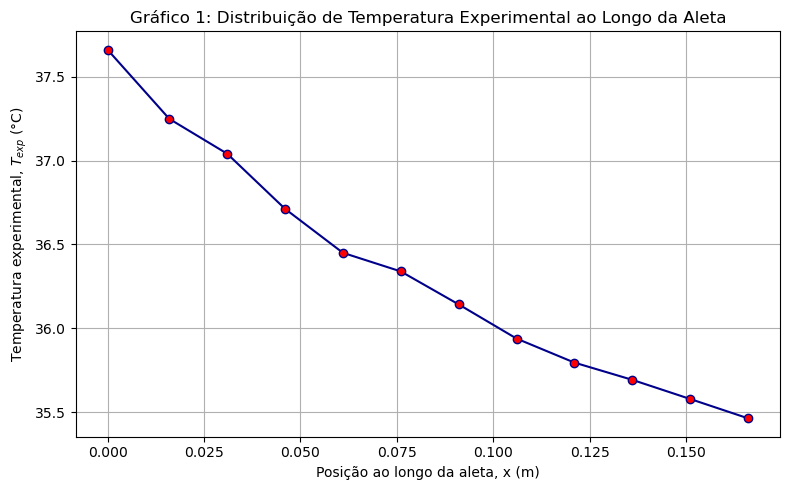

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- EXEMPLO DE SCRIPT PARA O GRÁFICO 1 ---

# 1) Se necessário, ler o arquivo (ajuste o nome conforme seu caso):
# df = pd.read_excel("sistema1.xlsx")

# 2) Defina um dicionário associando cada canal a sua posição (x) em metros:
#    OBS: ajuste as posições conforme seu projeto (valores abaixo são exemplos).
channel_positions = {
    '102 (°C)': 0.000,   # Base da aleta
    '103 (°C)': 0.016,   # 16 mm
    '104 (°C)': 0.031,
    '105 (°C)': 0.046,
    '106 (°C)': 0.061,
    '107 (°C)': 0.076,
    '108 (°C)': 0.091,
    '109 (°C)': 0.106,
    '110 (°C)': 0.121,
    '111 (°C)': 0.136,
    '112 (°C)': 0.151,
    '113 (°C)': 0.166,
}
# Se seu projeto usar posições ligeiramente diferentes, ajuste acima.

# 3) Calcular a temperatura média em cada canal de interesse (por exemplo, média de todas as leituras).
posicoes = []
temperaturas_medias = []

for canal, x_pos in channel_positions.items():
    # Calcula a média de temperatura desse canal
    T_media = df[canal].mean()
    posicoes.append(x_pos)
    temperaturas_medias.append(T_media)

# 4) Criar o gráfico
plt.figure(figsize=(8,5))
plt.plot(posicoes, temperaturas_medias, '-o', color='darkblue', markerfacecolor='red')
plt.xlabel("Posição ao longo da aleta, x (m)")
plt.ylabel("Temperatura experimental, $T_{exp}$ (°C)")
plt.title("Gráfico 1: Distribuição de Temperatura Experimental ao Longo da Aleta")
plt.grid(True)
plt.tight_layout()
plt.show()


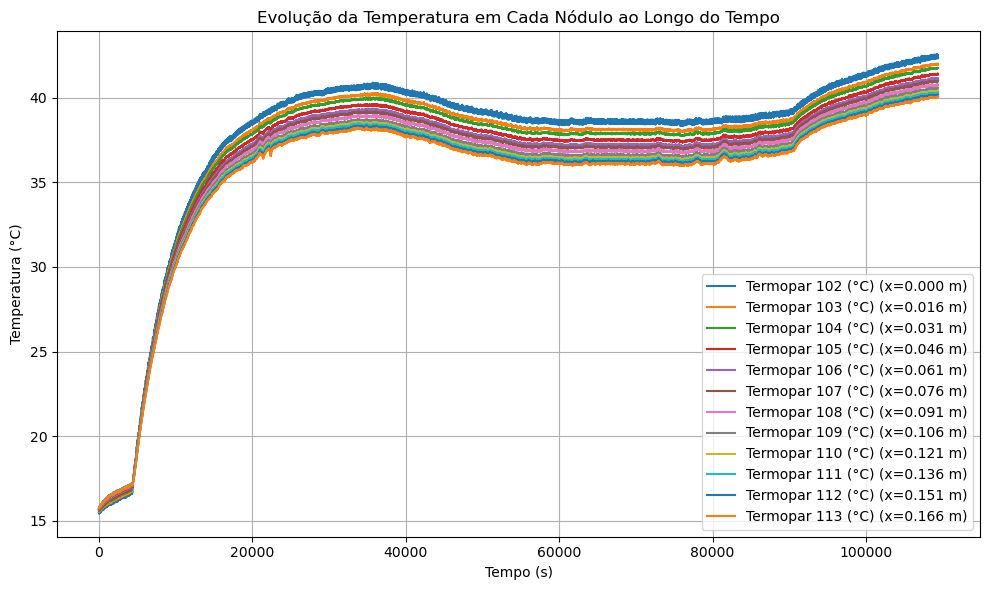

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) (Se necessário) Ler o DataFrame:
# df = pd.read_excel("sistema1.xlsx") 

# 2) Escolher qual coluna usar para o eixo x:
#    - Se quiser usar "Scan Number" (contador de cada leitura):
#        x_axis = df["Scan Number"]
#    - Se preferir usar "Scan Sweep Time (Sec)" (tempo absoluto em segundos):
#        x_axis = df["Scan Sweep Time (Sec)"]
#    - Se quiser um tempo relativo (começando em 0):
#        x_axis = df["101Time (Sec)"] - df["101Time (Sec)"].iloc[0]
#    - Ou simplesmente usar o índice:
#        x_axis = df.index


# 1) Converter a coluna para datetime
df["Scan Sweep Time (Sec)"] = pd.to_datetime(df["Scan Sweep Time (Sec)"])

# 2) Calcular o tempo decorrido em segundos, tomando como referência o primeiro registro
df["delta_t (s)"] = (df["Scan Sweep Time (Sec)"] - df["Scan Sweep Time (Sec)"].iloc[0]).dt.total_seconds()


#    Exemplo aqui: vamos usar "Scan Number" como eixo x
x_axis = df["delta_t (s)"]  

# 3) Definir os canais que queremos plotar (e suas posições, se quiser incluir no rótulo)
#    Ajuste conforme seus canais e distâncias reais
channels_positions = {
    "102 (°C)": 0.000,   # Base da aleta
    "103 (°C)": 0.016,
    "104 (°C)": 0.031,
    "105 (°C)": 0.046,
    "106 (°C)": 0.061,
    "107 (°C)": 0.076,
    "108 (°C)": 0.091,
    "109 (°C)": 0.106,
    "110 (°C)": 0.121,
    "111 (°C)": 0.136,
    "112 (°C)": 0.151,
    "113 (°C)": 0.166,
}

# 4) Plotar cada canal como uma curva distinta no gráfico
plt.figure(figsize=(10, 6))  # Tamanho do gráfico (opcional)

for canal, x_pos in channels_positions.items():
    # Rótulo inclui tanto o nome do canal quanto a posição na aleta (opcional)
    label_str = f"Termopar {canal} (x={x_pos:.3f} m)"  
    plt.plot(x_axis, df[canal], label=label_str)

plt.xlabel("Tempo (s)")  # ou "Tempo (s)" se usar tempo real
plt.ylabel("Temperatura (°C)")
plt.title("Evolução da Temperatura em Cada Nódulo ao Longo do Tempo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
